In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import statsmodels.formula.api as smf

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
import ast

In [4]:
PREFIX_PATH = 'data'
df = pd.read_csv(f'{PREFIX_PATH}/final_data_complete.csv')
df = df[['WikiID', 'merge_year', 'Genres', 'distilbert_emotions', 'ActorAge', 'ActorGender', 'ActorBirthDate', 'ActorGenderFlag']].copy()

df = df.dropna(subset=['distilbert_emotions'])
print("Number of rows", len(df))
df['distilbert_emotions'] = df['distilbert_emotions'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
df.head()

Number of rows 33684


,WikiID,merge_year,Genres,distilbert_emotions,ActorAge,ActorGender,ActorBirthDate,ActorGenderFlag
0,975900,2001.0,"['Thriller', 'Science Fiction', 'Horror', 'Adv...","{'disgust': 0.5021221041679382, 'fear': 0.3510...","[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, 37....","['F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', ...","[Timestamp('1958-08-26 00:00:00'), Timestamp('...","[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,9363483,1987.0,"['Thriller', 'Erotic thriller', 'Psychological...","{'anger': 0.5024036765098572, 'disgust': 0.324...","[32.0, 26.0]","['M', 'F']","[Timestamp('1954-05-08 00:00:00'), Timestamp('...","[0, 1]"
4,261236,1983.0,['Drama'],"{'anger': 0.3256497378461063, 'disgust': 0.163...","[32.0, 32.0, 35.0]","['F', 'M', 'M']","[Timestamp('1950-06-20 00:00:00'), Timestamp('...","[1, 0, 0]"
12,6631279,1997.0,"['Romantic comedy', 'Ensemble Film', 'Comedy-d...","{'sadness': 0.9155038595199585, 'neutral': 0.0...","[25.0, 33.0, 37.0, 35.0, 33.0, 48.0]","['M', 'F', 'F', 'M', 'F', 'F']","[Timestamp('1971-09-15 00:00:00'), Timestamp('...","[0, 1, 1, 0, 1, 1]"
13,171005,1989.0,"['Costume drama', 'War film', 'Epic', 'Period ...","{'neutral': 0.6794102787971497, 'surprise': 0....","[28.0, 51.0, 33.0, 26.0, 30.0, 32.0, 58.0, 53....","['M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', ...","[Timestamp('1960-12-10 00:00:00'), Timestamp('...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ..."


In [5]:
emotions = ['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy']
for emotion in emotions:
    df[emotion] = df['distilbert_emotions'].apply(lambda x: x[emotion])
df.head()

,WikiID,merge_year,Genres,distilbert_emotions,ActorAge,ActorGender,ActorBirthDate,ActorGenderFlag,disgust,fear,anger,neutral,sadness,surprise,joy
0,975900,2001.0,"['Thriller', 'Science Fiction', 'Horror', 'Adv...","{'disgust': 0.5021221041679382, 'fear': 0.3510...","[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, 37....","['F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', ...","[Timestamp('1958-08-26 00:00:00'), Timestamp('...","[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.502122,0.351022,0.065147,0.057085,0.018771,0.004086,0.001766
3,9363483,1987.0,"['Thriller', 'Erotic thriller', 'Psychological...","{'anger': 0.5024036765098572, 'disgust': 0.324...","[32.0, 26.0]","['M', 'F']","[Timestamp('1954-05-08 00:00:00'), Timestamp('...","[0, 1]",0.324022,0.032032,0.502404,0.096385,0.037811,0.005438,0.001907
4,261236,1983.0,['Drama'],"{'anger': 0.3256497378461063, 'disgust': 0.163...","[32.0, 32.0, 35.0]","['F', 'M', 'M']","[Timestamp('1950-06-20 00:00:00'), Timestamp('...","[1, 0, 0]",0.163747,0.002405,0.325650,0.440068,0.025255,0.005851,0.037024
12,6631279,1997.0,"['Romantic comedy', 'Ensemble Film', 'Comedy-d...","{'sadness': 0.9155038595199585, 'neutral': 0.0...","[25.0, 33.0, 37.0, 35.0, 33.0, 48.0]","['M', 'F', 'F', 'M', 'F', 'F']","[Timestamp('1971-09-15 00:00:00'), Timestamp('...","[0, 1, 1, 0, 1, 1]",0.021709,0.010488,0.006082,0.042634,0.915504,0.002163,0.001421
13,171005,1989.0,"['Costume drama', 'War film', 'Epic', 'Period ...","{'neutral': 0.6794102787971497, 'surprise': 0....","[28.0, 51.0, 33.0, 26.0, 30.0, 32.0, 58.0, 53....","['M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', ...","[Timestamp('1960-12-10 00:00:00'), Timestamp('...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...",0.004746,0.003841,0.016094,0.679410,0.057925,0.129912,0.108072


In [8]:
import plotly.express as px

emotion_sums = df[['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy']].sum()
fig = px.pie(
    names=emotion_sums.index, 
    values=emotion_sums.values, 
    title="Emotion Distribution Across All Movies"
)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background for the paper
    plot_bgcolor='rgba(0,0,0,0)',   # Transparent background for the plot
    title_font=dict(color="white"), # White color for the title
    legend_font=dict(color="white") # White color for the legend text
)

# Save the chart as a PNG image
fig.write_image("emotion_distribution_pie_chart_no_bg.png")

print("Pie chart saved as 'emotion_distribution_pie_chart_no_bg.png'")

fig.show()

Pie chart saved as 'emotion_distribution_pie_chart_no_bg.png'


### Regression age gender

In [ ]:
df = pd.read_csv(f'{PREFIX_PATH}/final_data_complete.csv')
character_df = df[['WikiID', 'merge_year', 'Genres', 'distilbert_emotions', 'ActorAge', 'ActorGender', 'ActorBirthDate', 'ActorGenderFlag']].copy()

# Drop rows without emotions, age or gender because they are not helpful here
print("Number of rows before droping: ", len(character_df))
character_df = character_df.dropna(subset=['distilbert_emotions', 'ActorAge', 'ActorGenderFlag'])
print("Number of rows after droping: ", len(character_df))

# Parse relevant attributes from string to correct datatype
character_df['Genres'] = character_df['Genres'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x))
character_df['ActorAge'] = character_df['ActorAge'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x))
character_df['ActorGender'] = character_df['ActorGender'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x))
character_df['ActorGenderFlag'] = character_df['ActorGenderFlag'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x))

# Check if transformations worked properly
test_ages = character_df.iloc[0]['ActorAge']
print(test_ages)
test_gender = character_df.iloc[0]['ActorGender']
print(test_gender)
test_gender_flag = character_df.iloc[0]['ActorGenderFlag']
print(test_gender_flag)
print(f"Age entries: {len(test_ages)}, gender entries: {len(test_gender)}, gender flag entries: {len(test_gender_flag)}")

# Create aggregations for gender and age of actors
exploded_df = character_df.explode('ActorAge')
exploded_df = exploded_df.explode('ActorGenderFlag')

aggregated_df = exploded_df.groupby('WikiID').agg({
    "ActorAge": "mean",
    "ActorGenderFlag": "mean"
})

aggregated_df.rename(columns={
    'ActorAge': 'AgeAvg', 
    'ActorGenderFlag': 'GenderAvg'
}, inplace=True)

character_df = character_df.merge(aggregated_df, on='WikiID', how='left')

# Parse emotions from string to dictionary
character_df['distilbert_emotions'] = character_df['distilbert_emotions'].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

# Check the result
test_emotions = character_df.iloc[0]['distilbert_emotions']
print(type(test_emotions))

# Add each emotion as column
emotions = ['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy']
for emotion in emotions:
    character_df[emotion] = character_df['distilbert_emotions'].apply(lambda x: x[emotion])
character_df.head()



Number of rows before droping:  81771
Number of rows after droping:  30175
[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, 37.78852253927453, 30.0, 37.78852253927453, 37.78852253927453, 42.0, 57.0, 37.78852253927453, 66.0, 47.0, 58.0]
['F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F']
[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Age entries: 17, gender entries: 17, gender flag entries: 17
<class 'dict'>
                            OLS Regression Results                            
Dep. Variable:                 AgeAvg   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     15.27
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.48e-17
Time:                        10:38:16   Log-Likelihood:            -1.0081e+05
No. Observations:               30175   AIC:                         2.016e+05
Df 

In [7]:
# Model for average age
age_mod = smf.ols(formula='AgeAvg ~ disgust + fear + anger + sadness + surprise + joy', data=character_df)
age_res = age_mod.fit()
print(age_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 AgeAvg   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     15.27
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.48e-17
Time:                        10:45:38   Log-Likelihood:            -1.0081e+05
No. Observations:               30175   AIC:                         2.016e+05
Df Residuals:                   30168   BIC:                         2.017e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.5932      0.153    252.223      0.0

/var/folders/dh/598mynx558b49xpd__0_7csw0000gn/T/ipykernel_63481/2912773837.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/var/folders/dh/598mynx558b49xpd__0_7csw0000gn/T/ipykernel_63481/2912773837.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


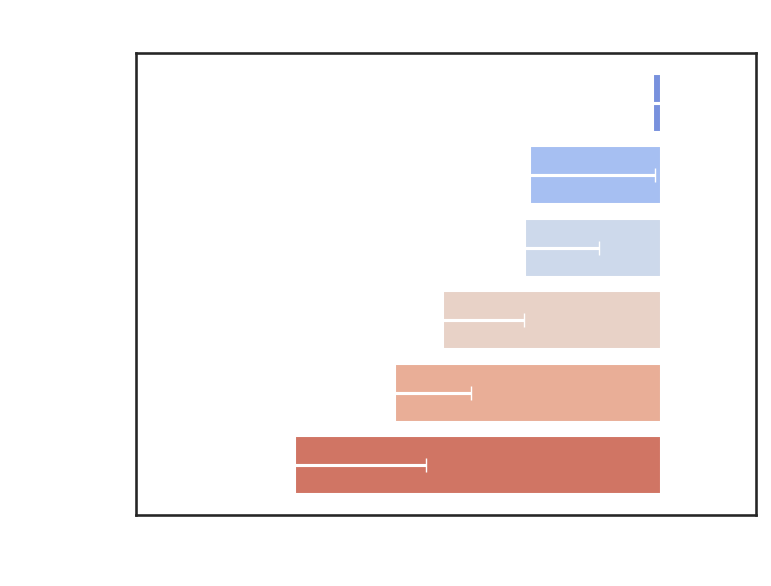

In [6]:
coefficients = age_res.params
errors = age_res.bse
conf_int = age_res.conf_int()
conf_int.columns = ['Lower', 'Upper']

# Create a DataFrame for the plot
coef_df = pd.DataFrame({
    'Emotion': coefficients.index,
    'Coefficient': coefficients.values,
    'Std Error': errors.values,
    'Lower': conf_int['Lower'],
    'Upper': conf_int['Upper']
})

# Filter out the intercept
coef_df = coef_df[coef_df['Emotion'] != 'Intercept']

# Sort for better visualization
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot with Seaborn
sns.set_theme(style='white', context='talk')
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=coef_df,
    x='Coefficient',
    y='Emotion',
    orient='h',
    palette='coolwarm',
    ci=None  # Confidence intervals added manually below
)

# Add confidence intervals
for index, row in coef_df.iterrows():
    plt.errorbar(
        x=row['Coefficient'], 
        y=index, 
        xerr=[[row['Coefficient'] - row['Lower']], [row['Upper'] - row['Coefficient']]],
        fmt='none', 
        ecolor='white', 
        capsize=5
    )

# Customizing the plot
plt.axvline(0, color='white', linestyle='--', linewidth=1.2)
plt.title('Impact of Emotional Tones on Average Actor Age', fontsize=16, color='white', pad=20)
plt.xlabel('Coefficient Value', fontsize=14, color='white')
plt.ylabel('Emotions', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor((0, 0, 0, 0))  # Transparent background
plt.gcf().set_facecolor((0, 0, 0, 0))  # Transparent background

# Save the plot
plt.savefig('coefficient_plot.png', dpi=300, transparent=True)
plt.show()

In [9]:
# Model for average gender
gender_mod = smf.ols(formula='GenderAvg ~ disgust + fear + anger + sadness + surprise + joy', data=character_df)
gender_res = gender_mod.fit()
print(gender_res.summary())

                            OLS Regression Results                            
Dep. Variable:              GenderAvg   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     89.66
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          5.67e-112
Time:                        11:25:22   Log-Likelihood:                 3147.5
No. Observations:               30175   AIC:                            -6281.
Df Residuals:                   30168   BIC:                            -6223.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3046      0.005     62.415      0.0

/var/folders/dh/598mynx558b49xpd__0_7csw0000gn/T/ipykernel_63481/3834385868.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
/var/folders/dh/598mynx558b49xpd__0_7csw0000gn/T/ipykernel_63481/3834385868.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


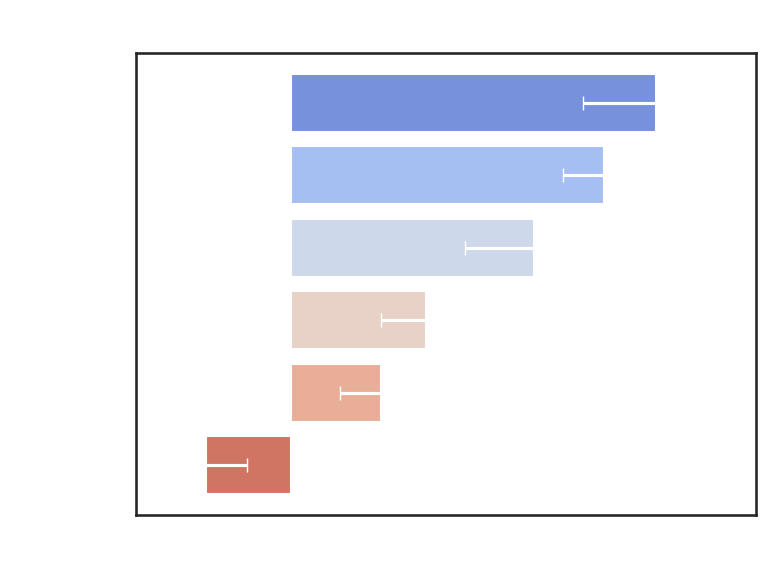

In [10]:
gender_coefficients = gender_res.params
gender_errors = gender_res.bse
gender_conf_int = gender_res.conf_int()
gender_conf_int.columns = ['Lower', 'Upper']

# Create a DataFrame for the plot
gender_coef_df = pd.DataFrame({
    'Emotion': gender_coefficients.index,
    'Coefficient': gender_coefficients.values,
    'Std Error': gender_errors.values,
    'Lower': gender_conf_int['Lower'],
    'Upper': gender_conf_int['Upper']
})

# Filter out the intercept
gender_coef_df = gender_coef_df[gender_coef_df['Emotion'] != 'Intercept']

# Sort for better visualization
gender_coef_df = gender_coef_df.sort_values(by='Coefficient', ascending=False)

# Plot with Seaborn
sns.set_theme(style='white', context='talk')
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=gender_coef_df,
    x='Coefficient',
    y='Emotion',
    orient='h',
    palette='coolwarm',
    ci=None  # Confidence intervals added manually below
)

# Add confidence intervals
for index, row in gender_coef_df.iterrows():
    plt.errorbar(
        x=row['Coefficient'], 
        y=index, 
        xerr=[[row['Coefficient'] - row['Lower']], [row['Upper'] - row['Coefficient']]],
        fmt='none', 
        ecolor='white', 
        capsize=5
    )

# Customizing the plot
plt.axvline(0, color='white', linestyle='--', linewidth=1.2)
plt.title('Impact of Emotional Tones on Average Gender', fontsize=16, color='white', pad=20)
plt.xlabel('Coefficient Value', fontsize=14, color='white')
plt.ylabel('Emotions', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor((0, 0, 0, 0))  # Transparent background
plt.gcf().set_facecolor((0, 0, 0, 0))  # Transparent background

# Save the plot
plt.savefig('gender_coefficient_plot.png', dpi=300, transparent=True)
plt.show()